###**importing ExoData package**

In [2]:
import sys

In [11]:
! pip install exodata

In [2]:
import exodata
#this is mandatory to run to load the data in a variable exocat; then objects can be accessed with this variable
exocat = exodata.load_db_from_url()

rejected duplicate satellite: 
				 in Jupiter
rejected duplicate satellite: 
				 in Jupiter
rejected duplicate satellite: 
				 in Jupiter
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Saturn
rejected duplicate satellite: 
				 in Uranus
rejected duplicate satellite: 
				 in Uranus
rejected duplicate satellite: 
				 in Uranus
rejected duplicate satellite: 
				 in Uranus


##**Using a variable "exocat" that will help us to use methods present in ExoData**

In [5]:
exocat.planetDict["Gliese 1214 b"]  #To retrieve a particular planet by giving the exact name

Planet('Gliese 1214 b')

In [6]:
exocat.searchPlanet("gj1214b")   #To retrieve a particular planet by searching

Planet('Gliese 1214 b')

##**Traverse the hierarchy for the planet- parent, star, system**

In [7]:
kepler10c = exocat.planetDict["Kepler-10 c"]
kepler10c

Planet('Kepler-10 c')

In [8]:
kepler10c.parent

Star('Kepler-10')

In [9]:
kepler10 = kepler10c.star
kepler10

Star('Kepler-10')

In [10]:
kepler10c.system

System('Kepler-10')

In [15]:
kepler10.planets  #Kepler-10: The planetary system Kepler-10 hosts at least 3 planets

[Planet('Kepler-10 b'), Planet('Kepler-10 c'), Planet('KOI-72.X')]

##**Retrieving Values: With an object selected we can query information from the database**

In [16]:
gj1252b = exocat.planetDict["GJ 1252 b"]
gj1252b

Planet('GJ 1252 b')

In [17]:
print (gj1252b.R)  # planetary radius; unit: Radius Jupiter 

0.106 R_j


In [18]:
print (gj1252b.a)  # orbit semi-major axis; unit: astronomical unit

0.00916 au


In [19]:
print (gj1252b.star.M)  # stellar mass of host star; unit: solar mass

0.38 M_s


##**The returned values are Product Quantities objects that act like floats or more precisely a single value numpy array but with a few extra features such as unit rescaling and dimensionality checking**

In [5]:
import exodata.astroquantities as aq

In [21]:
print (gj1252b.R.rescale(aq.R_e))  # rescale to earth radius- R_e

1.1631715586250198 R_e


In [22]:
print (gj1252b.M / gj1252b.R)  # mass / radius ratio

0.062075471698113206 M_j/R_j


##**Directly calling some equations from the exodata.equations module with the variables pre-filled**

In [23]:
print (gj1252b.calcDensity())

7.328525818557109 g/cm**3


In [24]:
print (gj1252b.calcTemperature())

1091.002413148085 K


In [25]:
hatp36b = exocat.planetDict["HAT-P-36 b"]
hatp36b 

Planet('HAT-P-36 b')

In [43]:
wasp118b = exocat.planetDict["WASP-118 b"]
wasp118b

Planet('WASP-118 b')

In [44]:
wasp118b.R

array(1.44) * R_j

In [45]:
wasp118=wasp118b.star
wasp118

Star('WASP-118')

In [46]:
wasp118b = exocat.planetDict["WASP-118 b"]
wasp2b

Planet('WASP-118 b')

In [47]:
wasp118bstar=wasp118b.star
wasp118bstar

Star('WASP-118')

In [48]:
#The total transit duration,defined as the time during which any part of the planet obscures the disc of the star, depends
#on how the planet transits the host star. If the exoplanet crosses the centre of the stellar disc (b=0), the transit duration
#is the longest and with b!=0 signifying a shorter transit duration.
wasp118ct=wasp118b.calcTransitDuration(circular=True) 
wasp118ct

array(290.82028204) * min

In [49]:
wasp118b.R.rescale(aq.m)

array(1.0067184e+08) * m

In [50]:
wasp118b.dec  #calculates latitude in degree

<Latitude 2.70284756 deg>

In [51]:
wasp118b.dec.dms  #calculates latitude in degrees, minutes and seconds

dms_tuple(d=2.0, m=42.0, s=10.251200000000011)

In [69]:
cnc = exocat.planetDict["55 Cancri e"]
cnc

Planet('55 Cancri e')

##**Querying the database**

In [52]:
superEarths = [planet for planet in exocat.planets if planet.R < (10 * aq.R_e)]   #Super Earths

In [53]:
len(superEarths)  #number of Super Earths

2897

In [57]:
#Planets discovered by Transit method
detected_by_transit = [planet for planet in exocat.planets
                  if planet.discoveryMethod =="transit"]

In [58]:
len(detected_by_transit)

3396

In [61]:
print (detected_by_transit[:5])  #Top 5 planets(alphabetical order) which have discovery method as Transit

[Planet('1SWASP J1407 b'), Planet('55 Cancri e'), Planet('Alpha Centauri B c'), Planet('AU Mic b'), Planet('BD+20 594 b')]


In [63]:
import numpy as np
radius_list = [planet.R for planet in exocat.planets   #list of every planets radius; 
               if planet.R is not np.nan]              #some are not available so use np.nan

In [64]:
print (len(radius_list))
print (np.mean(radius_list))   #mean radius calculated from radius_list; unit: R_j

3424
0.39062702811212935


##**equations from Kepler's Third Law**

In [73]:
from exodata.equations import KeplersThirdLaw

In [74]:
KeplersThirdLaw(a=0.01488*aq.au, M_s=0.176*aq.M_s).P

array(1.57969614) * d

##**Methods to calculate different properties**

In [69]:
gj1214b = exocat.planetDict['Gliese 1214 b']

In [70]:
gj1214b.calcSurfaceGravity()

array(7.92973578) * m/s**2

In [71]:
gj1214b.calcLogg()

2.8992587166958947

In [72]:
gj1214b.calcTransitDuration(circular=True)

array(52.74732534) * min

In [83]:
kepler20b=exocat.searchPlanet("Kepler-20 b")
kepler20b

Planet('Kepler-20 b')

In [84]:
kepler20b.calcTransitDuration(circular=True)

array(132.50703178) * min

In [86]:
kepler20b.discoveryMethod

'transit'

In [87]:
kepler20b.description

"The Kepler-20 system hosts at least five transiting exo-planets. Kepler-20 b has a period of only 3.7 days. Because it is about twice as big as the Earth, it is classified as a super-Earth or sub-Neptune. Kepler-20 b's composition is ambiguous. It could be a terrestrial planet with a rocky surface or it could have a significant gas envelope."

In [88]:
kepler20b.calcPeriod()

array(3.69471756) * d

In [89]:
kepler20b.isTransiting

True

In [90]:
kepler20b.type

<bound method Planet.type of Planet('Kepler-20 b')>

In [91]:
# The transit depth is the ratio of the surface area of the star's disk blocked out by the planet's disk, 
#so the transit depth is the square of the planet radius divided by the star's radius
kepler20b.calcTransitDepth()

array(0.00032394) * dimensionless

In [92]:
kepler20b.discoveryYear

2011

In [94]:
hd108236f=exocat.searchPlanet("HD 108236 f")
hd108236f

Planet('HD 108236 f')

In [96]:
hd108236f.discoveryYear

2021

In [73]:
#Assumptions- These are how a planet is classified according to mass, radius temp. along with assumption for the
#albedo(measure of how much light that hits a surface is reflected without being absorbed),etc.
#This is stored in directory exodata.assumptions.planetAssumptions
exodata.assumptions.planetAssumptions['massType']

[(array(10.) * M_e, 'Super-Earth'),
 (array(20.) * M_e, 'Neptune'),
 (inf, 'Jupiter')]

In [13]:
len(exocat.transitingPlanets)  #to calculate no.(length/size) of transiting exoplanets

3415

In [14]:
len(exocat.planets)           #to calculate no.(length/size) of planets in the database right now

4528

In [15]:
len(exocat.stars)            #to calculate no.(length/size) of planets in the database right now

3527

In [16]:
len(exocat.systems)          #to calculate no.(length/size) of systems in the database right now

3329

In [20]:
comb=exocat.searchPlanet("11 Com b")
comb

Planet('11 Com b')

In [71]:
anb=exocat.searchPlanet("14 And b")
anb

Planet('14 And b')

In [124]:
print (anb.M.rescale(aq.M_e))  # rescale to earth mass- M_e

1525.9527911871523 M_e


In [72]:
print(anb.star)

Star('14 And')


##**Potentially Habitable exoplanets**

In [12]:
#In order to be potentially habitable, an exoplanet would range between 0.5 and 2.5 Earth radii and
#have to have a mass between 0.1 and 10 Earth masses and
#temperature should be in a range 182K to 285K to maintain liquid water
#eccentricity between 0.5 and 0.7

planet_list=[]
for planet in exocat.planets:
    if 0.5*aq.R_e < planet.R < 2.5*aq.R_e:
        if 0.1*aq.M_e < planet.M < 10*aq.M_e:
            if 182*aq.K < planet.calcTemperature() < 285*aq.K:
                planet_list.append(planet)
                
                        
          
        
len(planet_list)        
# print(planet_list)        

11

In [13]:
for i in planet_list:
    print(i)
    print(i.description)
    print("\n") 

Planet('EPIC 201912552 b')
This planet was discovered by the Kepler spacecraft during its extended K2 mission, Campaign 1. This planet may be an interesting target for atmospheric studies of transiting exoplanets. Its density lies between that of Earth-like and Neptune-like planets.


Planet('Kepler-445 b')
Kepler-445 is an M-dwarf with transit signals of three short-period planets.


Planet('Kepler-446 c')
Kepler-446 is an M-dwarf with transit signals of three short-period planets.


Planet('Kepler-446 d')
Kepler-446 is an M-dwarf with transit signals of three short-period planets.


Planet('LHS 1140 b')
This planet was discovered by Dittmann et al. 2017. This was a ground based discovery. The parameters listed here are those reported by Ment et al. 2019 and were imported into the Open Exoplanet Catalogue from the NASA Exoplanet Archive.


Planet('Earth')
Earth is the only known planet able to sustain life.


Planet('Mars')
Mars is named after the Roman god of war and often called the

##**ExoData plotting library**

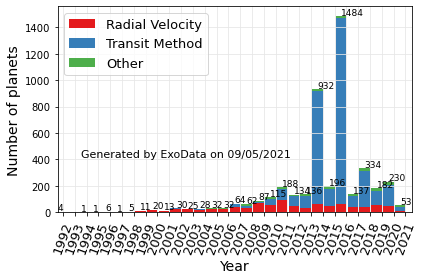

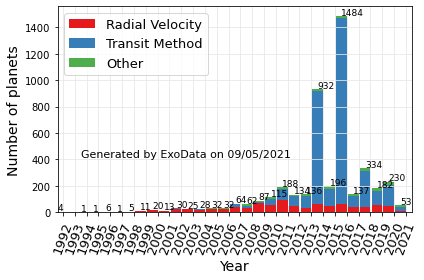

In [3]:
#no. of planets discovered by Radial Velocity, Transit methods- which are 2 popular methods and Other which
#includes all the other discovery methods plotted on y-axis and discovery year on x-axis
dm_plot = exodata.plots.DiscoveryMethodByYear(exocat.planets, methods_to_plot=('RV', 'transit', 'Other'))
dm_plot.plot(method_labels=('Radial Velocity', 'Transit Method', 'Other'

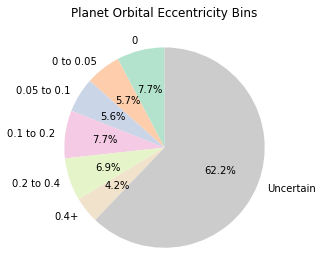

In [8]:
#e- orbital eccentricity of an astronomical object is a dimensionless parameter that determines the amount by which its 
#orbit around another body deviates from a perfect circle
exodata.plots.DataPerParameterBin(exocat.planets, 'e', (0, 0, 0.05, 0.1, 0.2, 0.4, float('inf'))).plotPieChart()

C:\Users\rashi maru\anaconda3\lib\site-packages\exodata\plots.py:280: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


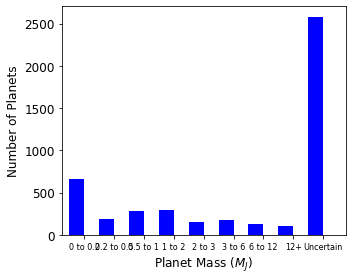

In [9]:
#no. of planets on the y axis; Jupiter Planet Mass on x-axis
#Jupiter mass, also called Jovian mass, is the unit of mass equal to the total mass of the planet Jupiter
exodata.plots.DataPerParameterBin(exocat.planets, 'M',
(0, 0.2, 0.5, 1, 2, 3, 6, 12, float('inf'))).plotBarChart(c='b')